Anyone using this repo please pip install requirement.txt

Also, if you use any additional libraries, please pip freeze -> requirement.txt to update dependencies list or elsa I'll freeze your internet.

In [111]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [112]:
# import kagglehub
# kagglehub.login()

In [113]:


'''
# Download datasets from competition to local folder "data"
import os
import shutil

os.makedirs('data', exist_ok=True)
path = kagglehub.competition_download("petfinder-adoption-prediction")
print(f"Files downloaded to: {path}")

# Copy all files and folders from cache to local data folder
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join('data', item)
    
    if os.path.isdir(s):
        # If it's a directory, copy the tree (remove destination if exists to overwrite)
        if os.path.exists(d):
            shutil.rmtree(d)
        shutil.copytree(s, d)
    elif os.path.isfile(s):
        # If it's a file, copy it
        shutil.copy2(s, d)

print(f"Files and folders copied to: {os.path.abspath('data')}")

# Read the data from the LOCAL data folder to be safe
# Note: 'train/train.csv' usually comes inside the zip, check if it's directly in 'data'
local_train_path = os.path.join('data', "train", "train.csv")
if not os.path.exists(local_train_path):
    # Fallback if structure is flat inside data
    local_train_path = os.path.join('data', "train.csv")
'''

'\n# Download datasets from competition to local folder "data"\nimport os\nimport shutil\n\nos.makedirs(\'data\', exist_ok=True)\npath = kagglehub.competition_download("petfinder-adoption-prediction")\nprint(f"Files downloaded to: {path}")\n\n# Copy all files and folders from cache to local data folder\nfor item in os.listdir(path):\n    s = os.path.join(path, item)\n    d = os.path.join(\'data\', item)\n\n    if os.path.isdir(s):\n        # If it\'s a directory, copy the tree (remove destination if exists to overwrite)\n        if os.path.exists(d):\n            shutil.rmtree(d)\n        shutil.copytree(s, d)\n    elif os.path.isfile(s):\n        # If it\'s a file, copy it\n        shutil.copy2(s, d)\n\nprint(f"Files and folders copied to: {os.path.abspath(\'data\')}")\n\n# Read the data from the LOCAL data folder to be safe\n# Note: \'train/train.csv\' usually comes inside the zip, check if it\'s directly in \'data\'\nlocal_train_path = os.path.join(\'data\', "train", "train.csv")\ni

In [114]:
# "Tabular data"
pet_df = pd.read_csv('data/train/train.csv')
print ("Tabular data of shape:", pet_df.shape)
print ("")
# Columns Information
pet_df.info()

pet_df.head()


Tabular data of shape: (14993, 24)

<class 'pandas.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  str    
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [115]:
pet_df['Name']

0                Nibble
1           No Name Yet
2                Brisco
3                  Miko
4                Hunter
              ...      
14988               NaN
14989    Serato & Eddie
14990           Monkies
14991           Ms Daym
14992              Fili
Name: Name, Length: 14993, dtype: str

In [116]:
def featurize_table(tabular_df):
    # Namelength
    tabular_df["name_length"] = tabular_df['Name'].str.len().fillna(0)
    
    # Description length
    tabular_df['description_length'] = tabular_df['Description'].str.len().fillna(0)
    
    # Drop unused columns
    tabular_df.drop(['Name', 'PetID', 'RescuerID', 'Description'], axis=1, inplace=True)
    return tabular_df

pet_features = featurize_table(pet_df)
pet_features.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,name_length,description_length
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2,6.0,359.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0,11.0,118.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3,6.0,393.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2,4.0,146.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2,6.0,390.0


In [117]:
# Text data
description_df = pd.read_csv('data/train/train.csv')
description_df = description_df[['Description', 'AdoptionSpeed']]
description_df.head()

,Description,AdoptionSpeed
0,Nibble is a 3+ month old ball of cuteness. He ...,2
1,I just found it alone yesterday near my apartm...,0
2,Their pregnant mother was dumped by her irresp...,3
3,"Good guard dog, very alert, active, obedience ...",2
4,This handsome yet cute boy is up for adoption....,2


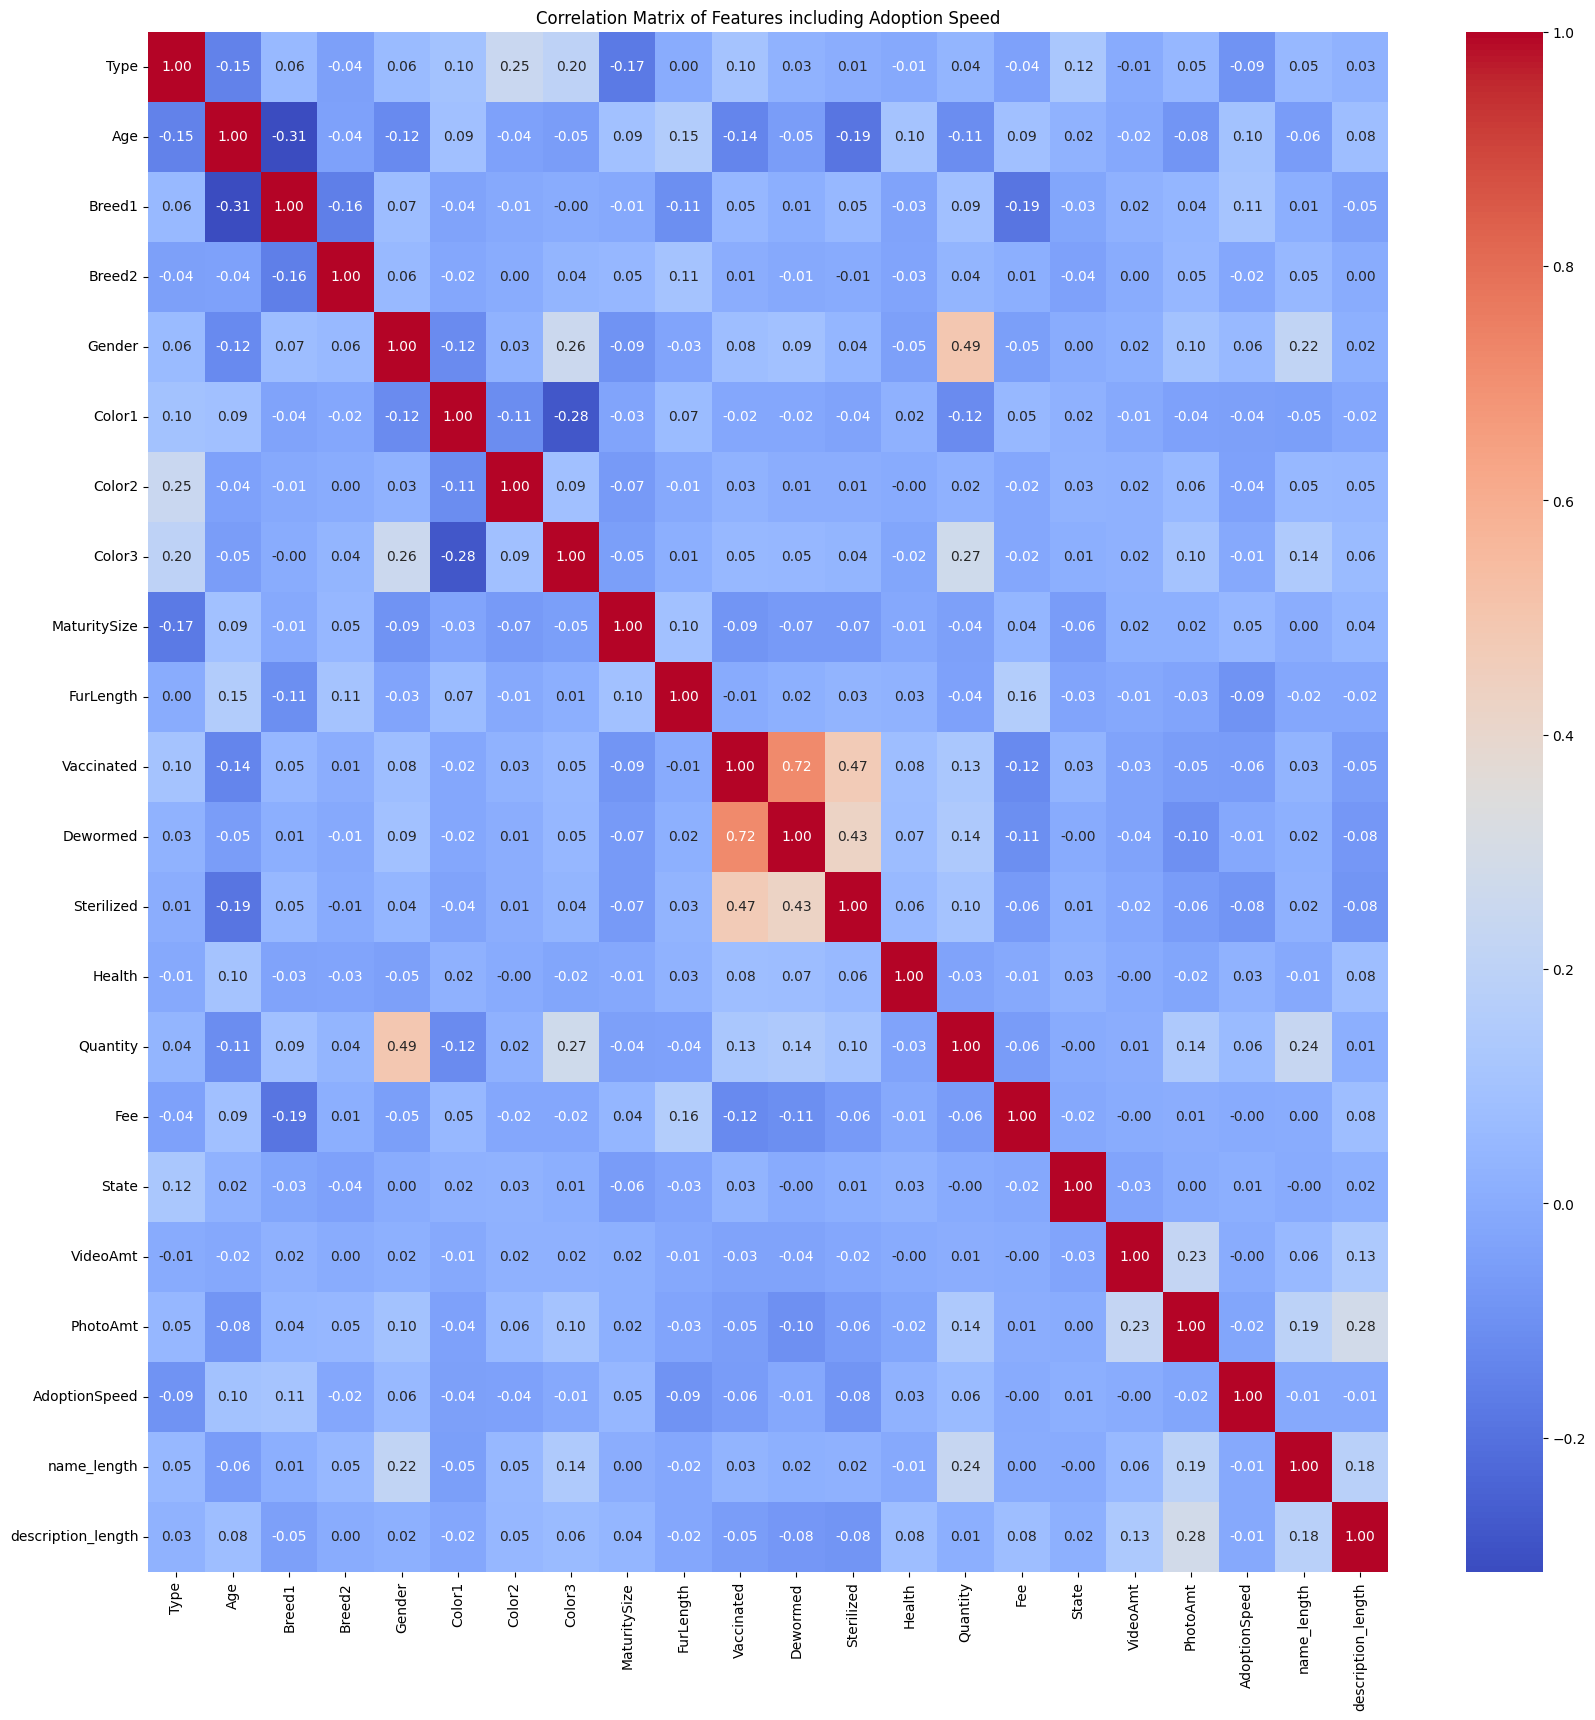

In [118]:
# Correlation Matrix
plt.figure(figsize=(20, 20))
sns.heatmap(pet_features.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features including Adoption Speed')
plt.show()

In [119]:
# Preprocess the data before plotting specifics
breed = pd.read_csv("data/BreedLabels.csv")
colors = pd.read_csv("data/ColorLabels.csv")
states = pd.read_csv("data/StateLabels.csv")
eda_df = pet_df.copy()

# Mapping ordinal to actual name
# Map Type to Name (1=Dog, 2=Cat)
eda_df['Type_Name'] = eda_df['Type'].map({1: 'Dog', 2: 'Cat'})

# Map Gender (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
eda_df['Gender_Name'] = eda_df['Gender'].map({1: 'Male', 2:'Female', 3:'Mixed'})

# Map MaturitySize (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
maturity_map = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'}
eda_df['MaturitySize_Name'] = eda_df['MaturitySize'].map(maturity_map)

# Merging into IDs to get name for plotting
# Merge State names
eda_df = eda_df.merge(states, left_on='State', right_on='StateID', how='left')
eda_df.drop(["State", "StateID"], axis=1, inplace=True)

# Merge Breed names (for Breed1)
eda_df = eda_df.merge(breed[['BreedID', 'BreedName']], left_on='Breed1', right_on='BreedID', how='left')
eda_df.rename(columns={'BreedName': 'Breed1_Name'}, inplace=True)
eda_df.drop(["BreedID"], axis=1, inplace=True)
eda_df = eda_df.merge(breed[['BreedID', 'BreedName']], left_on='Breed2', right_on='BreedID', how='left')
eda_df.rename(columns={'BreedName': 'Breed2_Name'}, inplace=True)
eda_df.drop(["BreedID"], axis=1, inplace=True)

# Merge Color names (for Color1)
eda_df = eda_df.merge(colors, left_on='Color1', right_on='ColorID', how='left')
eda_df.rename(columns={'ColorName': 'Color1_Name'}, inplace=True)
eda_df.drop(["ColorID"], axis=1, inplace=True)
eda_df = eda_df.merge(colors, left_on='Color2', right_on='ColorID', how='left')
eda_df.rename(columns={'ColorName': 'Color2_Name'}, inplace=True)
eda_df.drop(["ColorID"], axis=1, inplace=True)
eda_df = eda_df.merge(colors, left_on='Color3', right_on='ColorID', how='left')
eda_df.rename(columns={'ColorName': 'Color3_Name'}, inplace=True)
eda_df.drop(["ColorID"], axis=1, inplace=True)
display(eda_df.head())

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,name_length,description_length,Type_Name,Gender_Name,MaturitySize_Name,StateName,Breed1_Name,Breed2_Name,Color1_Name,Color2_Name,Color3_Name
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,0,1.0,2,6.0,359.0,Cat,Male,Small,Selangor,Tabby,NaN,Black,White,NaN
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,0,2.0,0,11.0,118.0,Cat,Male,Medium,Kuala Lumpur,Domestic Medium Hair,NaN,Black,Brown,NaN
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,0,7.0,3,6.0,393.0,Dog,Male,Medium,Selangor,Mixed Breed,NaN,Brown,White,NaN
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,0,8.0,2,4.0,146.0,Dog,Female,Medium,Kuala Lumpur,Mixed Breed,NaN,Black,Brown,NaN
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,0,3.0,2,6.0,390.0,Dog,Male,Medium,Selangor,Mixed Breed,NaN,Black,NaN,NaN


<Figure size 1200x600 with 0 Axes>

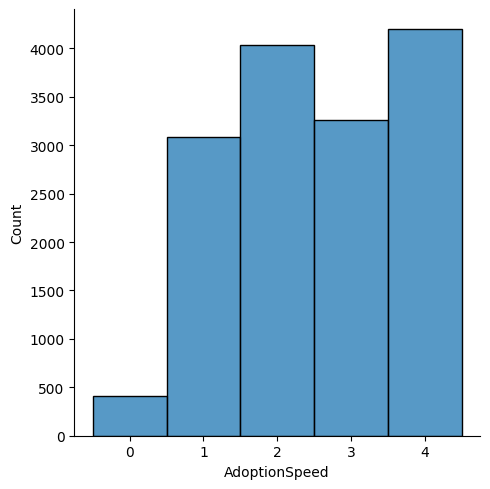

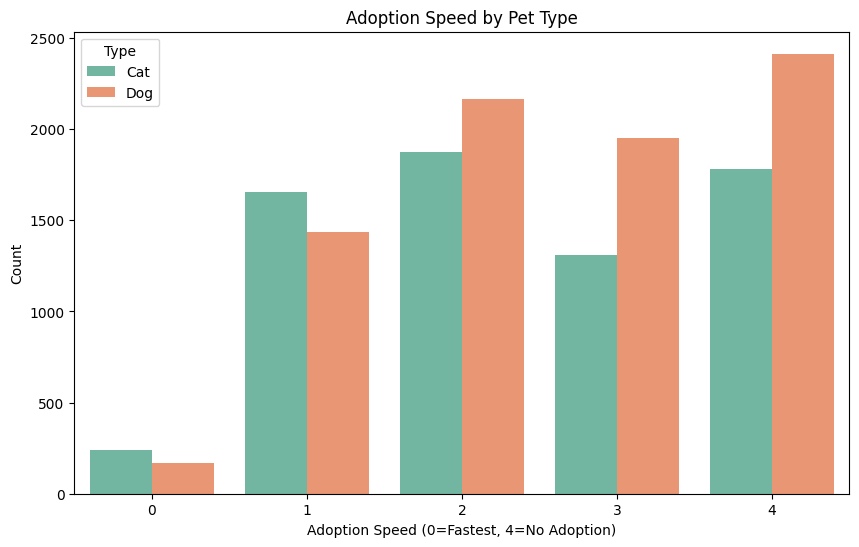

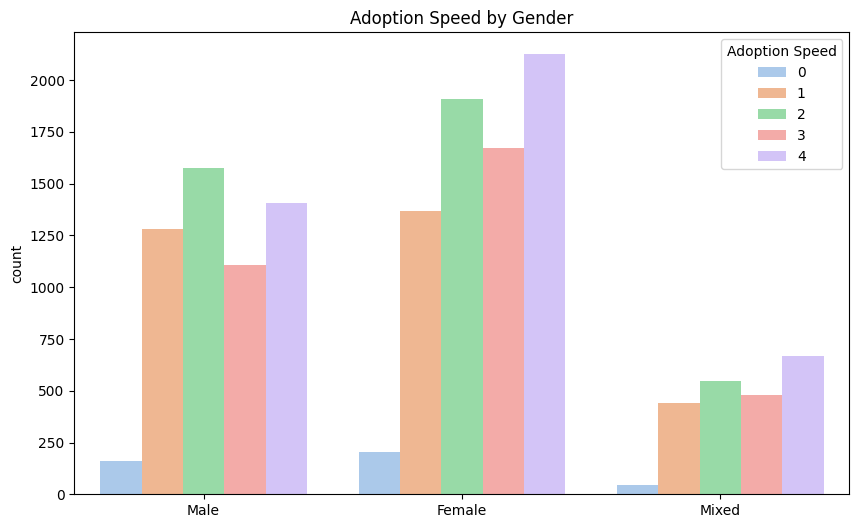

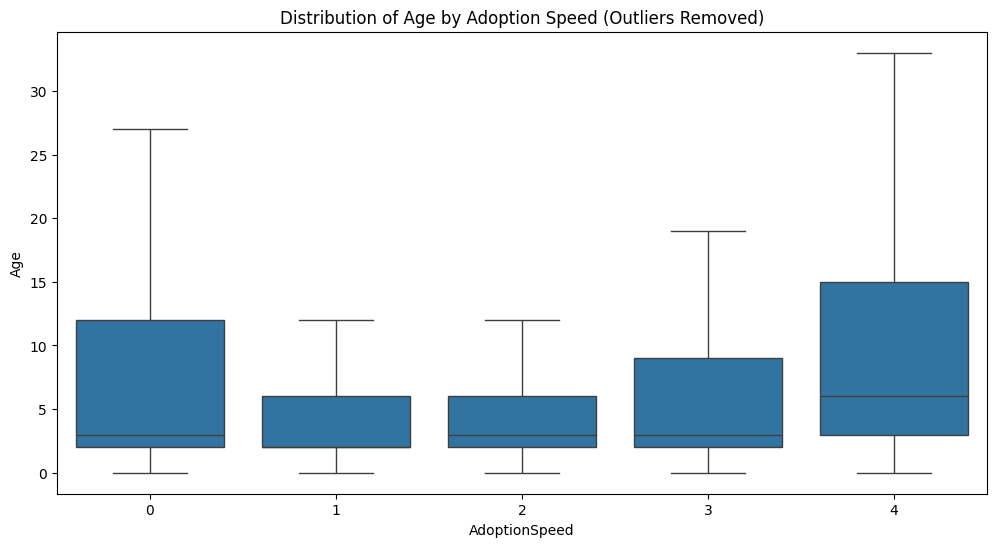

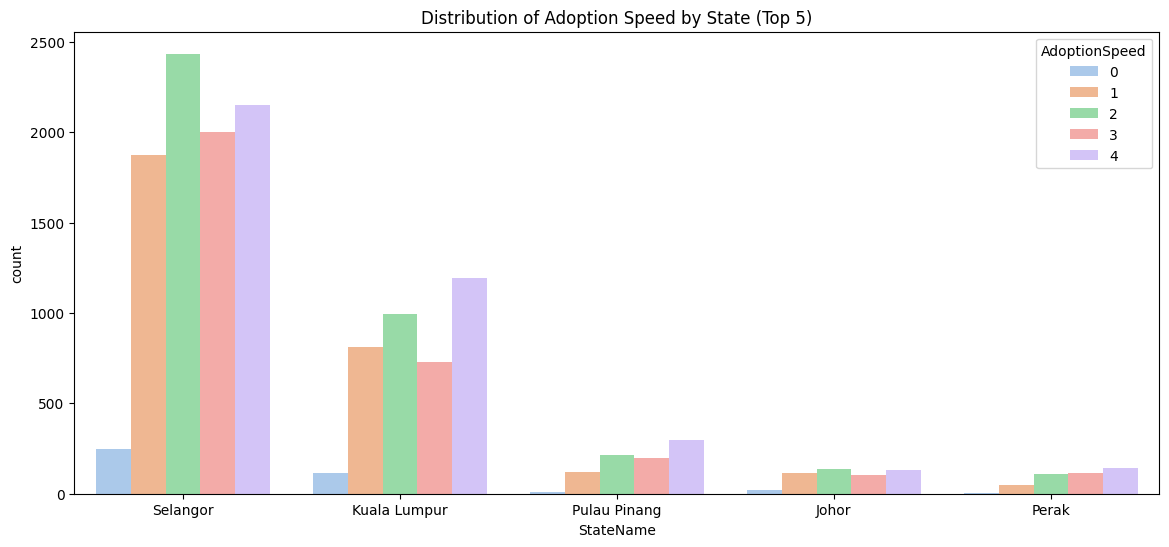

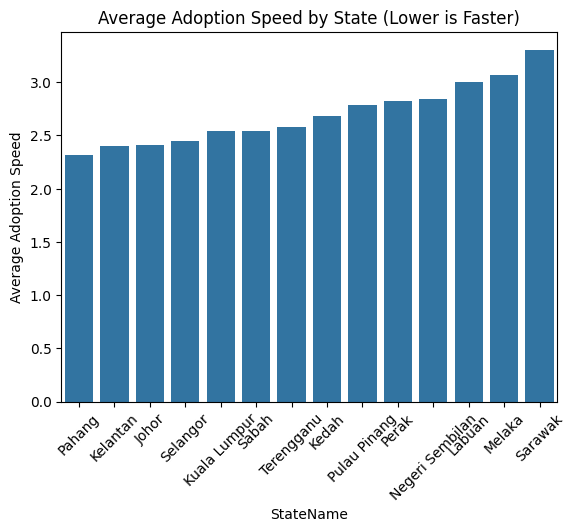

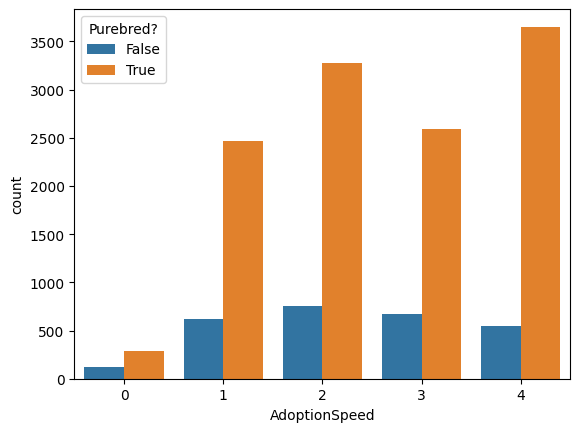

C:\Users\tanap\AppData\Local\Temp\ipykernel_26104\3294810479.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda_df, x="AdoptionSpeed", y="Age", ax=axes[0], palette="coolwarm")


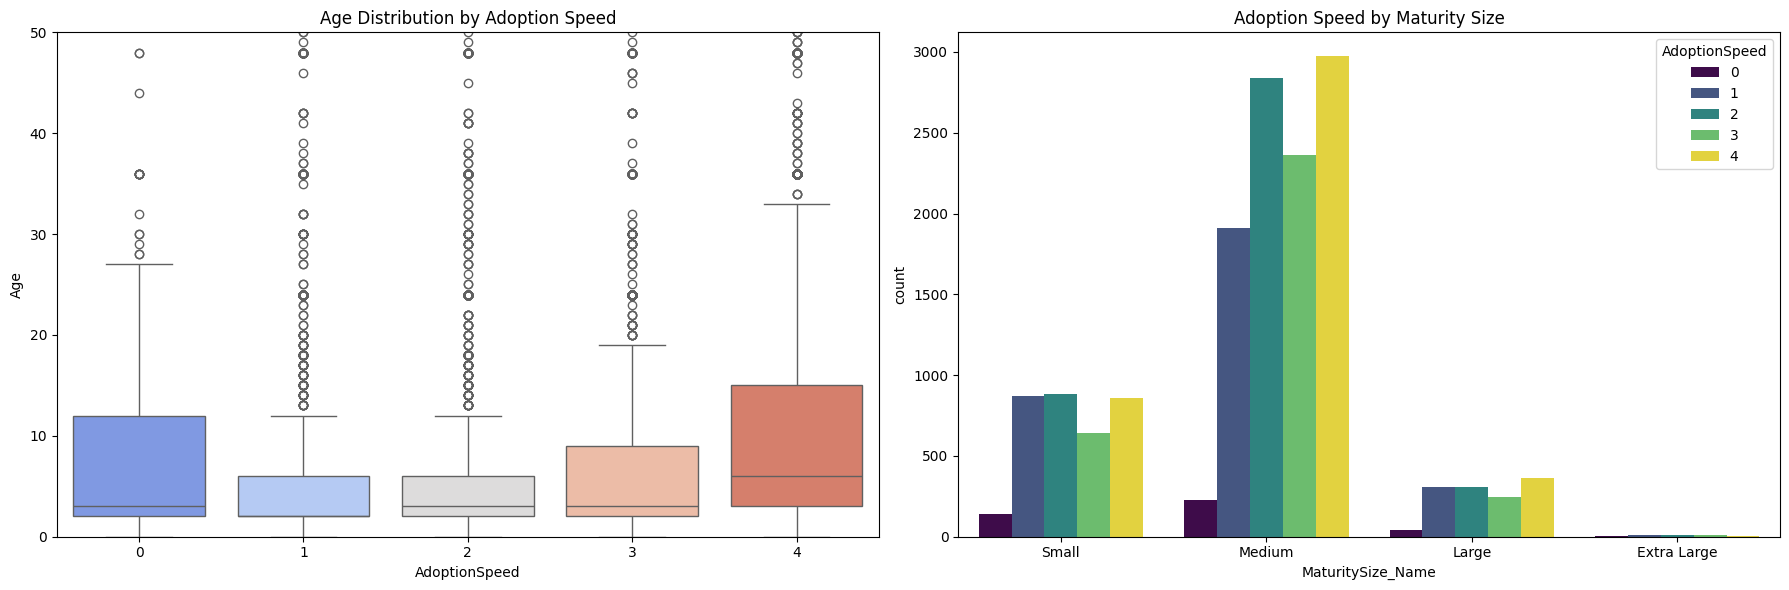

In [120]:
# EDA to see how each factor affect adoption speed

# Distribution of target
plt.figure(figsize=(12,6))
sns.displot(data=pet_df, x="AdoptionSpeed", discrete=True)
plt.show()

# Adoption Speed by Type (Dog vs Cat)
plt.figure(figsize=(10, 6))
sns.countplot(data=eda_df, x="AdoptionSpeed", hue="Type_Name", palette="Set2")
plt.title("Adoption Speed by Pet Type")
plt.xlabel("Adoption Speed (0=Fastest, 4=No Adoption)")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

# Adoption Speed by Gender
plt.figure(figsize=(10, 6))
# Gender: 1=Male, 2=Female, 3=Mixed (if applicable)
sns.countplot(data=eda_df, x="Gender", hue="AdoptionSpeed", palette="pastel")
plt.title("Adoption Speed by Gender")
plt.legend(title="Adoption Speed", loc='upper right')
plt.xlabel("")
plt.xticks([0, 1, 2], ['Male', 'Female', 'Mixed'])
plt.show()

# Adoption Speed by Age (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda_df, x="AdoptionSpeed", y="Age", showfliers=False)
plt.title("Distribution of Age by Adoption Speed (Outliers Removed)")
plt.show()

# Adoption Speed by State (Top 5)
plt.figure(figsize=(14, 6))
top_5_states = eda_df['StateName'].value_counts().head(5).index
sns.countplot(
    data=eda_df[eda_df['StateName'].isin(top_5_states)], 
    x="StateName", 
    hue="AdoptionSpeed", 
    order=top_5_states,
    palette="pastel"
)
plt.title("Distribution of Adoption Speed by State (Top 5)")
plt.show()

avg_speed_by_state = eda_df.groupby('StateName')["AdoptionSpeed"].mean().sort_values()
sns.barplot(x=avg_speed_by_state.index, y=avg_speed_by_state.values)
plt.title("Average Adoption Speed by State (Lower is Faster)")
plt.ylabel("Average Adoption Speed")
plt.xticks(rotation=45)
plt.show()

# Purebred vs Mixed -> is there Breed2 listed?
eda_df["is_purebred"] = (eda_df['Breed2'] == 0) | (eda_df['Breed1'] == eda_df['Breed2'])
sns.countplot(data=eda_df, x="AdoptionSpeed", hue='is_purebred')
plt.legend(title="Purebred?")
plt.show()
eda_df.groupby('is_purebred')['AdoptionSpeed'].mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age distribution by Adoption Speed
sns.boxplot(data=eda_df, x="AdoptionSpeed", y="Age", ax=axes[0], palette="coolwarm")
axes[0].set_title("Age Distribution by Adoption Speed")
axes[0].set_ylim(0, 50) # Limit to 50 months to ignore outliers for better view

# Maturity Size
sns.countplot(data=eda_df, x="MaturitySize_Name", hue="AdoptionSpeed", ax=axes[1], palette="viridis")
axes[1].set_title("Adoption Speed by Maturity Size")

plt.tight_layout()
plt.show()


In [121]:
# Feature Engineering Ideas
# Already have name? -> or how each name affect speed?

## NOTE: How to do ensemble?
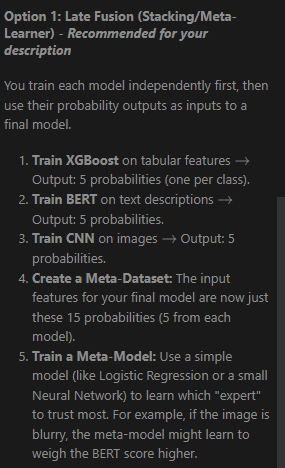
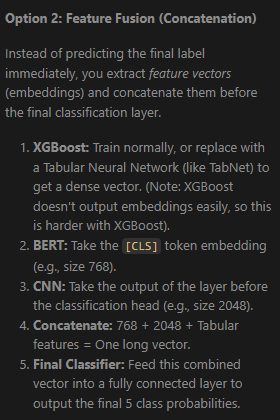
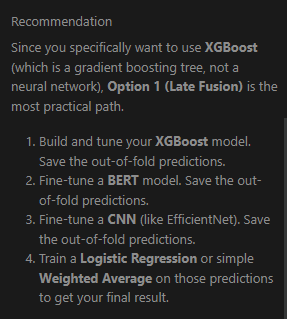